# Project 2

In this project, I examine the association between tree counts and air quality across New York City boroughs. The analysis uses two datasets from NYC Open Data: the 2015 Street Tree Census, which provides the number of trees by borough, and the Air Quality (PM2.5) dataset, which reports annual fine particulate matter levels by borough. By aggregating and merging these datasets in Python, I explore whether boroughs with more trees tend to have better air quality.

# Initializing
I will start by initializing the data from the data sources, and cleaning the data for the analysis required

In [116]:
import pandas as pd
import matplotlib.pyplot as plt


In [119]:
df_trees = pd.read_csv("https://data.cityofnewyork.us/resource/nwxe-4ae8.csv?$limit=50000")
df_trees.head()

KeyboardInterrupt: 

In [125]:
df_air = pd.read_csv("https://data.cityofnewyork.us/resource/c3uy-2p5r.csv?$limit=50000")
df_air.head()

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,message
0,878218,386,Ozone (O3),Mean,ppb,UHF42,402,West Queens,Summer 2023,2023-06-01T00:00:00.000,34.365989,NaN
1,876975,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,501,Port Richmond,Summer 2023,2023-06-01T00:00:00.000,11.331992,NaN
2,876900,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,207,East Flatbush - Flatbush,Summer 2023,2023-06-01T00:00:00.000,12.020333,NaN
3,877140,375,Nitrogen dioxide (NO2),Mean,ppb,CD,205,Fordham and University Heights (CD5),Summer 2023,2023-06-01T00:00:00.000,14.123178,NaN
4,874556,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,410,Rockaways,Summer 2023,2023-06-01T00:00:00.000,8.150637,NaN


In [120]:
df_air["year"] = df_air["time_period"].astype(str).str[-4:]
df_air["year"] = pd.to_numeric(df_air["year"], errors="coerce")
df_air_boro = df_air_boro.dropna(subset=["year"])
df_air_boro["year"] = df_air_boro["year"].astype(int)


In [121]:
trees_grouped = (
    df_trees_boro
    .groupby( "boroname")
    .size()
    .reset_index(name="tree_count")
)
trees_grouped

,boroname,tree_count
0,Bronx,5246
1,Brooklyn,13274
2,Manhattan,7817
3,Queens,17777
4,Staten Island,5886


In [122]:
df_air_boro = df_air[df_air["geo_type_name"] == "Borough"]

df_air_boro_grouped = (
    df_air_boro
    .groupby(["geo_place_name", "year"], as_index=False)["data_value"]
    .mean()
)
df_air_boro_grouped

df_air_boro_avg = df_air_boro_grouped.groupby("geo_place_name")["data_value"].mean().reset_index()
df_air_boro_avg.columns = ["borough", "pm25_mean"]
df_air_boro_avg

,borough,pm25_mean
0,Bronx,26.904556
1,Brooklyn,21.157865
2,Manhattan,28.866734
3,Queens,18.481042
4,Staten Island,15.575172


Now the two datasets have been cleaned and organized at the borough level, allowing us to directly examine the association between tree counts and average PM2.5 air quality across New York City.

In [123]:
trees_grouped = trees_grouped.rename(columns={"boroname": "borough"})
df_merge = trees_grouped.merge(df_air_boro_avg, on="borough", how="inner")
df_merge

,borough,tree_count,pm25_mean
0,Bronx,5246,26.904556
1,Brooklyn,13274,21.157865
2,Manhattan,7817,28.866734
3,Queens,17777,18.481042
4,Staten Island,5886,15.575172


Now we'll merge the two datasets on boroughs to have all entries in one dataframe

# Visualization

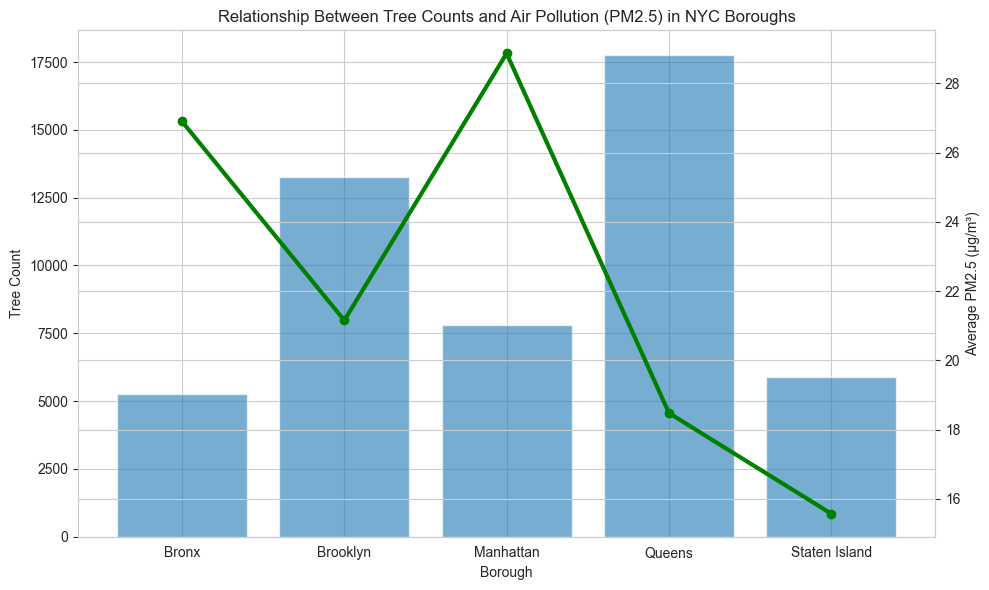

In [124]:
plt.figure(figsize=(10,6))

# bar chart for tree count
plt.bar(df_merge["borough"], df_merge["tree_count"], alpha=0.6, label="Tree Count")

# create second axis for PM2.5
ax1 = plt.gca()
ax2 = ax1.twinx()

# line plot for PM2.5
ax2.plot(df_merge["borough"], df_merge["pm25_mean"], color="green", marker="o", linewidth=3, label="Average PM2.5")

# labels
ax1.set_xlabel("Borough")
ax1.set_ylabel("Tree Count")
ax2.set_ylabel("Average PM2.5 (µg/m³)")

plt.title("Relationship Between Tree Counts and Air Pollution (PM2.5) in NYC Boroughs")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Key Takeaways

Boroughs with more trees tend to have lower PM2.5 levels. Queens and Brooklyn, which have relatively high tree counts, show the lowest average PM2.5.

Boroughs with fewer trees show higher pollution. Manhattan and the Bronx stand out with higher average PM2.5 despite lower tree counts.

While this visualization does not establish causality, it shows a clear negative association between tree density and air pollution across NYC boroughs.

Staten Island is a special case. Although it has a low number of trees and low PM2.5 levels, this relationship may be influenced by confounding factors such as lower population density, fewer major highways, and less industrial activity. These factors likely contribute to cleaner air independent of tree coverage.
